**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!

![Woman working on multiple screens](marketinganalytics.jpg)


The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|

Carefully observe and analyze the features in the dataset, asking yourself if there are any **categorical attributes** requiring pre-processing?

The subscribers dataset from the `data/AZWatch_subscribers.csv` file is already being loaded and split into training and test sets for you:

In [118]:
# Import the necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Specify the file path of your CSV file
file_path = "data/AZWatch_subscribers.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Separate predictor variables from class label
X = df.drop(['subscriber_id','subscription_status'], axis=1)
y = df.subscription_status

# Split intro training and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)

In [119]:
# Start your code here! Use as many cells as you like!
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [120]:
X_train_copy = pd.get_dummies(X_train_copy, drop_first=True)
X_test_copy = pd.get_dummies(X_test_copy, drop_first=True)

In [121]:
# train on models 
def train_data(X_train, y_train):
    
    model1 = LogisticRegression()
    model1.fit(X_train, y_train)
    model2 = DecisionTreeClassifier(criterion='gini',max_depth=3)
    model2.fit(X_train, y_train)
    model3 = RandomForestClassifier(max_depth=3)
    model3.fit(X_train, y_train)
    
    return model1, model2, model3

In [122]:
model1, model2, model3 = train_data(X_train_copy, y_train)

In [123]:
LR_score = model1.score(X_test_copy, y_test)
DT_score = model2.score(X_test_copy, y_test)
RF_score = model3.score(X_test_copy, y_test)
print(f'lR Accuracy score: {LR_score}')
print(f'DT Accuracy score: {DT_score}')
print(f'RF Accuracy score : {RF_score}')

lR Accuracy score: 0.92
DT Accuracy score: 0.92
RF Accuracy score : 0.92


In [124]:
score = RF_score

In [125]:
X_train

,age_group,engagement_time,engagement_frequency
29,35 and over,5.00,3
535,35 and over,2.77,9
695,35 and over,4.67,19
557,under 18,6.97,10
836,18-34,6.88,5
...,...,...,...
106,35 and over,3.70,8
270,under 18,3.05,6
860,35 and over,7.70,15
435,35 and over,5.00,6


In [126]:
def segment_data(X):
    
    segmentation  = X.drop(['age_group'], axis=1)
    # scale the numerical data attributes 
    scaler = StandardScaler()
    seg_normalized = scaler.fit_transform(segmentation)
    
    return segmentation, seg_normalized
    

In [127]:
segmentation,seg_norm  = segment_data(X)

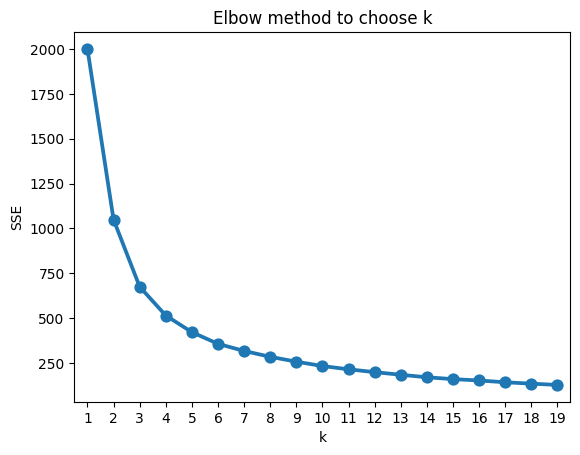

In [128]:
# plot an an elbow method to determine the amount of clusters to use 
sse = {}
for k in range(1,20):
    Kmeans = KMeans(n_clusters=k, random_state=42)
    Kmeans.fit(seg_norm)
    sse[k] = Kmeans.inertia_
    
plt.title('Elbow method to choose k')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [129]:
# Apply k-means clustering with 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit_predict(seg_norm)

#  add clusters labels as a new attributes in the datasets before scaling 
segmentation["cluster_id"] = kmeans.labels_

In [130]:
segmentation.head()

,engagement_time,engagement_frequency,cluster_id
0,5.55,7,1
1,5.12,12,1
2,4.25,4,1
3,8.54,15,0
4,12.12,20,0


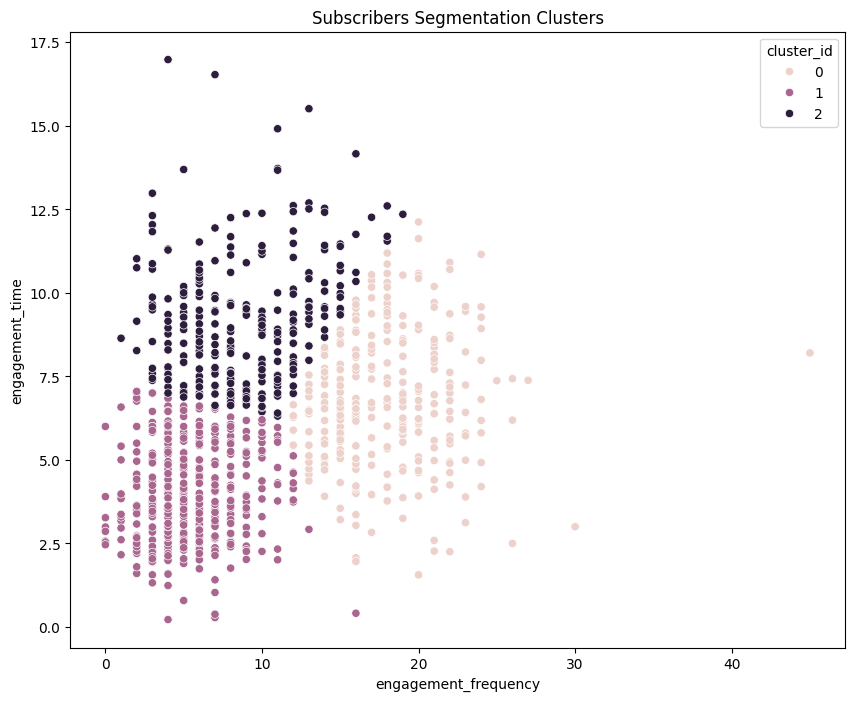

In [131]:
# plot a scatter to view each clusters 
plt.figure(figsize=(10,8))

sns.scatterplot(data=segmentation, y='engagement_time', x='engagement_frequency', hue='cluster_id')

plt.ylabel('engagement_time')
plt.xlabel('engagement_frequency')
plt.title("Subscribers Segmentation Clusters")
plt.show()

In [132]:
# Analyse the average engagement time and frequency for each cluster_id 
analysis = segmentation.groupby(['cluster_id']).agg(
    {'engagement_time':['mean'],
    'engagement_frequency':['mean']}).round(0)
analysis 

,engagement_time,engagement_frequency
,mean,mean
cluster_id,,
0,7.0,18.0
1,4.0,5.0
2,9.0,9.0
